In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import math
from sklearn.metrics import mean_squared_error

In [13]:
#reading the stock market csv file
df1=pd.read_csv('/content/stock_market (1).csv')

In [14]:
#We are reversing the data frame here,for better understanding
df2=df1[::-1]
l=[i for i in range(1235)]
df2.insert(8,"Index",l)
df2.set_index("Index",drop=True,inplace=True)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 86.8+ KB


In [16]:
df2.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [17]:
df2.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [18]:
df2.corr(numeric_only=True)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


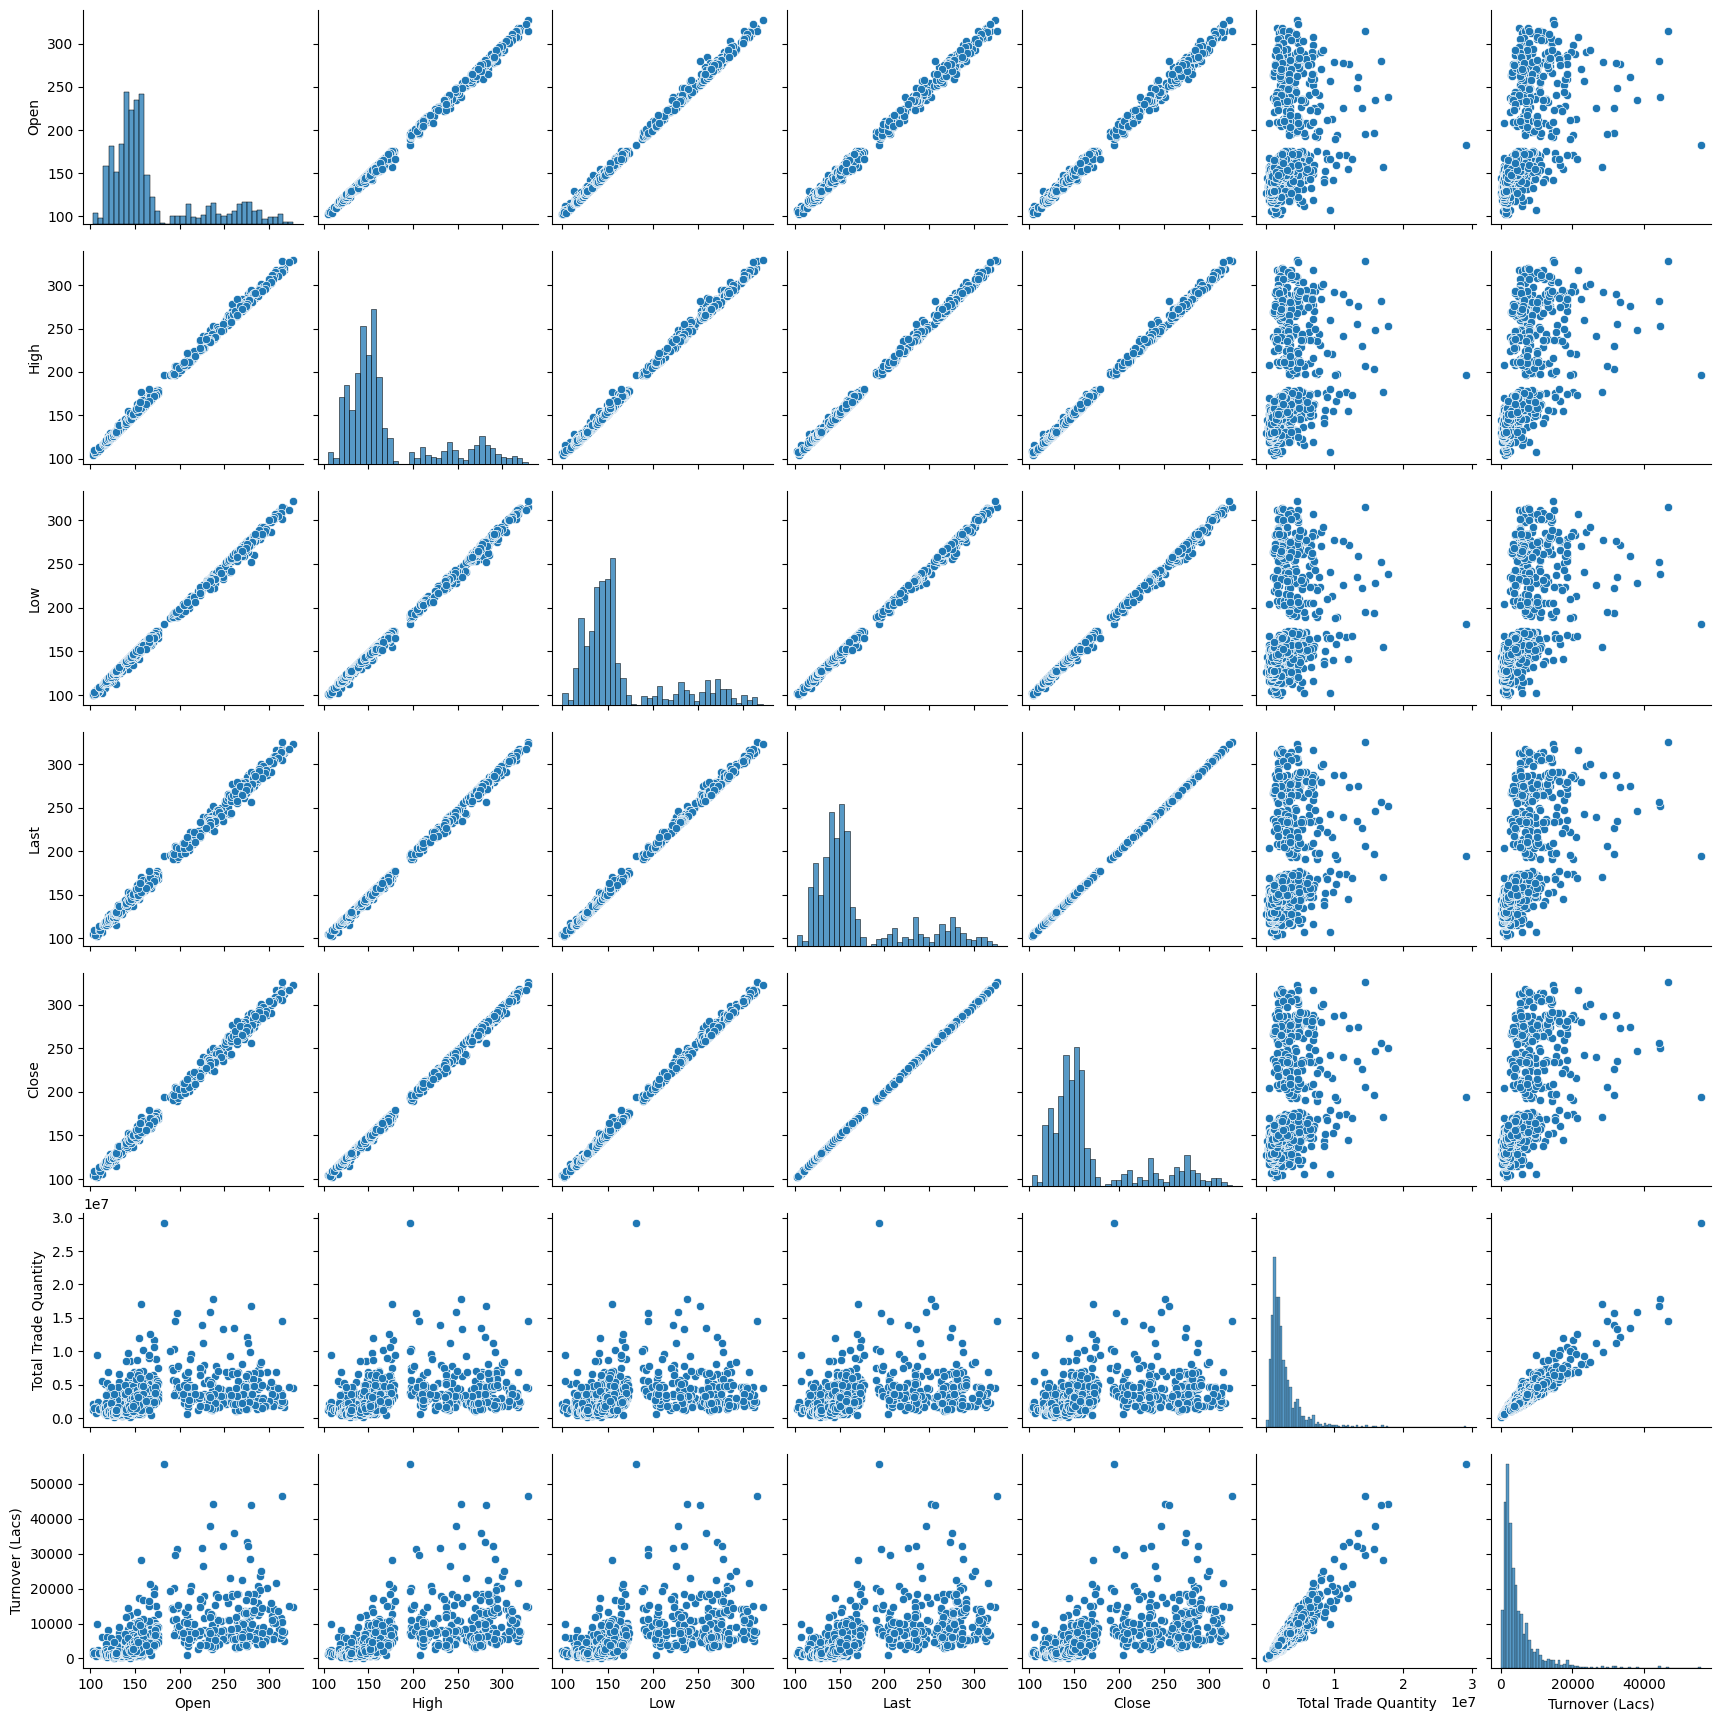

In [19]:
import seaborn as sns
sns.pairplot(df2)

Text(0, 0.5, 'Close')

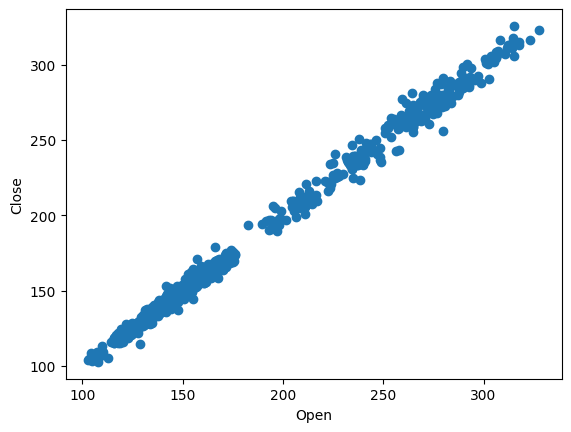

In [20]:
plt.scatter(df2['Open'],df2['Close'])
plt.xlabel("Open")
plt.ylabel("Close")

In [21]:
#here open,high,low,last are taken as input and close as output
output=df2[["Close"]]
features = ["Open","High","Low","Last"]

In [22]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
feature_transform = scaler.fit_transform(df2[features])
output_variable=scaler.fit_transform(output)
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df2.index)

In [23]:
print(feature_transform)

           Open      High       Low      Last
Index                                        
0      0.240320  0.237341  0.249041  0.238191
1      0.234535  0.239126  0.244304  0.235953
2      0.235870  0.250725  0.251974  0.258339
3      0.258789  0.262547  0.266185  0.256100
4      0.257454  0.253625  0.260320  0.253862
...         ...       ...       ...       ...
1230   0.585447  0.579969  0.546131  0.571748
1231   0.565198  0.592907  0.567336  0.554511
1232   0.536271  0.549632  0.524024  0.513320
1233   0.507343  0.508588  0.477780  0.481979
1234   0.467290  0.524872  0.482066  0.507723

[1235 rows x 4 columns]


In [24]:
feature_transform

,Open,High,Low,Last
Index,,,,
0,0.240320,0.237341,0.249041,0.238191
1,0.234535,0.239126,0.244304,0.235953
2,0.235870,0.250725,0.251974,0.258339
3,0.258789,0.262547,0.266185,0.256100
4,0.257454,0.253625,0.260320,0.253862
...,...,...,...,...
1230,0.585447,0.579969,0.546131,0.571748
1231,0.565198,0.592907,0.567336,0.554511
1232,0.536271,0.549632,0.524024,0.513320


In [25]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_variable[:len(train_index)], output_variable[len(train_index): (len(train_index)+len(test_index))]

In [26]:
feature_transform[:len(train_index)]

,Open,High,Low,Last
Index,,,,
0,0.240320,0.237341,0.249041,0.238191
1,0.234535,0.239126,0.244304,0.235953
2,0.235870,0.250725,0.251974,0.258339
3,0.258789,0.262547,0.266185,0.256100
4,0.257454,0.253625,0.260320,0.253862
...,...,...,...,...
1118,0.814419,0.821102,0.828333,0.819118
1119,0.814197,0.821771,0.828559,0.821133
1120,0.821985,0.817310,0.824047,0.808596


In [27]:
output_variable[:len(train_index)].shape

(1123, 1)

In [28]:
# len(train_index)
len(test_index)

112

In [29]:
len(train_index)/(len(train_index)+len(test_index))

0.9093117408906882

In [30]:
#For LSTM networks, we require to reshape an input data into 3D Tensor
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = testX.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
trainX

array([[0.24032043, 0.23734107, 0.24904128, 0.23819118],
       [0.23453494, 0.23912559, 0.24430408, 0.23595254],
       [0.23587005, 0.25072496, 0.25197383, 0.25833893],
       ...,
       [0.82198487, 0.81730984, 0.82404692, 0.80859637],
       [0.80106809, 0.8182021 , 0.82021205, 0.81083501],
       [0.80129061, 0.83270132, 0.82133995, 0.83501231]])

In [32]:
X_train.shape[0]

1123

In [33]:
X_train.shape[1]

4

In [34]:
testX.shape

(112, 4)

In [35]:
X_train.shape

(1123, 4, 1)

In [36]:
X_test.shape

(112, 4, 1)

In [37]:
print(X_train)

[[[0.24032043]
  [0.23734107]
  [0.24904128]
  [0.23819118]]

 [[0.23453494]
  [0.23912559]
  [0.24430408]
  [0.23595254]]

 [[0.23587005]
  [0.25072496]
  [0.25197383]
  [0.25833893]]

 ...

 [[0.82198487]
  [0.81730984]
  [0.82404692]
  [0.80859637]]

 [[0.80106809]
  [0.8182021 ]
  [0.82021205]
  [0.81083501]]

 [[0.80129061]
  [0.83270132]
  [0.82133995]
  [0.83501231]]]


In [38]:
print(y_train)

[[0.23823398]
 [0.2371134 ]
 [0.25773196]
 ...
 [0.81107127]
 [0.80905424]
 [0.83572389]]


In [39]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(trainX.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0779 - val_loss: 0.0274
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0210 - val_loss: 0.0276
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.2706e-04 - val_loss: 6.6762e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3367e-04 - val_loss: 5.5805e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5426e-04 - val_loss: 5.4404e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3302e-04 - val_loss: 4.5645e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9609e-04 - val_loss: 3.9927e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5407e-04 - val_loss: 3.8077e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3758e-04 - val_loss: 3.6675e

In [41]:
train_pred= model.predict(X_train)
test_pred=model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [42]:
################ R2 score #####################3

from sklearn.metrics import r2_score
score=r2_score(y_test,test_pred)
print(score)

0.9067517911279791


In [43]:
#Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9032658767776232

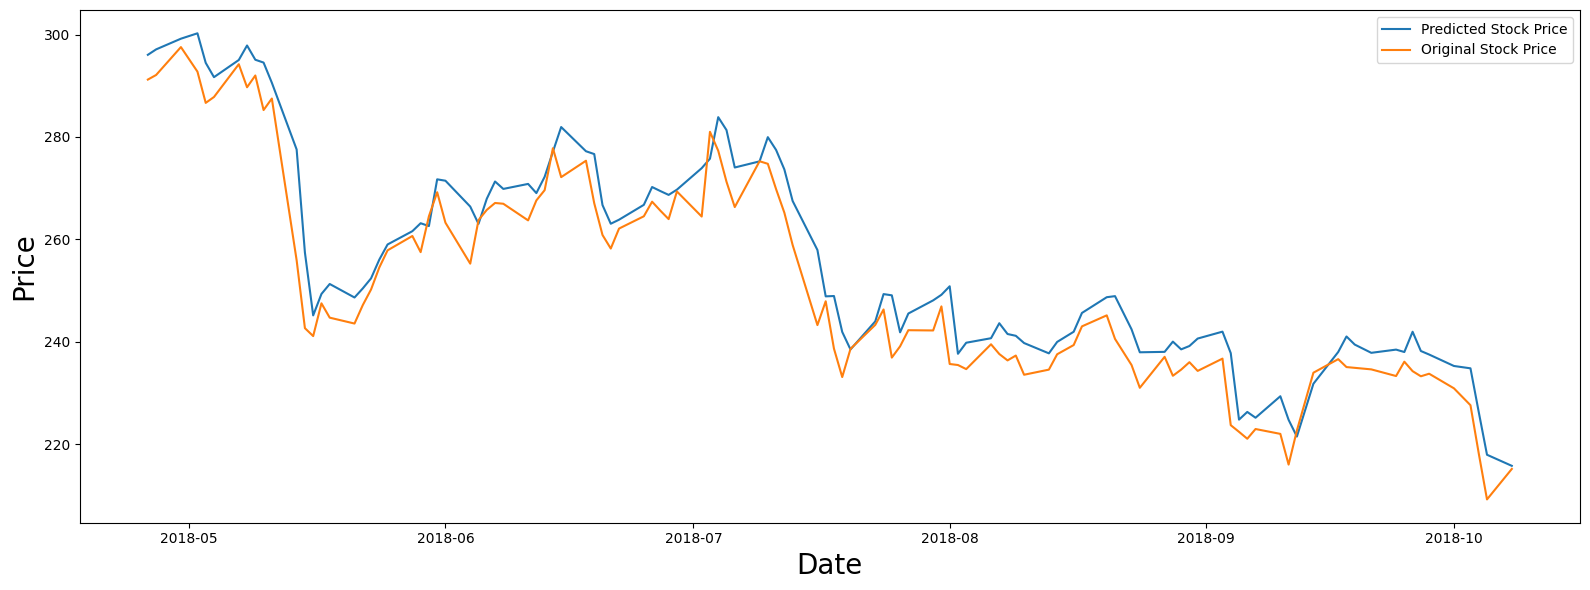

In [44]:
#plot of original vs predicted values
df2["Date"]=pd.to_datetime(df2["Date"])
f1={"family":'sans-serif',"color":"k",'size':20}
plt.figure(figsize=(16,6))
plt.plot(df2["Date"][-112:],scaler.inverse_transform(test_pred),label="Predicted Stock Price")
plt.plot(df2["Date"][-112:],scaler.inverse_transform(y_test),label="Original Stock Price")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.legend()
plt.tight_layout()

In [45]:
l1=train_pred.tolist()
l2=test_pred.tolist()
l1.extend(l2)
l3=np.array(l1)
predicted=scaler.inverse_transform(l3)
df2["Date"]=pd.to_datetime(df2["Date"])

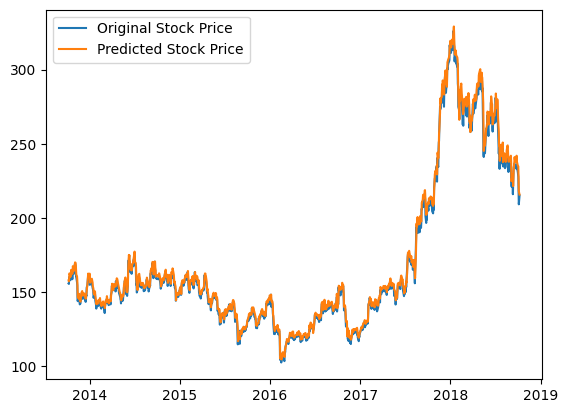

In [46]:
plt.plot(df2["Date"],df2["Close"],label="Original Stock Price")
plt.plot(df2["Date"],predicted,label="Predicted Stock Price")
plt.legend()

In [47]:
df2.insert(8,"Close_Predicted",predicted)
df2.drop("Total Trade Quantity",inplace=True,axis=1)
df2.drop("Turnover (Lacs)",inplace=True,axis=1)
df2.to_csv("Newly_predicted_values.csv")

In [48]:
df2

,Date,Open,High,Low,Last,Close,Close_Predicted
Index,,,,,,,
0,2013-10-08,157.00,157.80,155.20,155.80,155.80,158.029866
1,2013-10-09,155.70,158.20,154.15,155.30,155.55,157.349079
2,2013-10-10,156.00,160.80,155.85,160.30,160.15,159.001479
3,2013-10-11,161.15,163.45,159.00,159.80,160.05,162.665175
4,2013-10-14,160.85,161.45,157.70,159.30,159.45,161.613639
...,...,...,...,...,...,...,...
1230,2018-10-01,234.55,234.60,221.05,230.30,230.90,235.262114
1231,2018-10-03,230.00,237.50,225.75,226.45,227.60,234.804523
1232,2018-10-04,223.50,227.80,216.15,217.25,218.20,226.271473


In [49]:
model

<Sequential name=sequential, built=True>

In [50]:
predicted

array([[158.02986596],
       [157.34907863],
       [159.00147941],
       ...,
       [226.27147348],
       [217.92392816],
       [215.75947246]])

In [51]:
test_pred

array([[0.86682594],
       [0.8715769 ],
       [0.88093835],
       [0.88565576],
       [0.85979986],
       [0.8472616 ],
       [0.86227846],
       [0.8749855 ],
       [0.8625098 ],
       [0.86002725],
       [0.8423702 ],
       [0.7839396 ],
       [0.69373035],
       [0.6386978 ],
       [0.65744823],
       [0.66619027],
       [0.65436196],
       [0.662302  ],
       [0.6711087 ],
       [0.6875427 ],
       [0.7007912 ],
       [0.7124244 ],
       [0.71937627],
       [0.71689886],
       [0.757821  ],
       [0.7565968 ],
       [0.7339629 ],
       [0.71881884],
       [0.74077874],
       [0.75593066],
       [0.7494223 ],
       [0.7537972 ],
       [0.74576694],
       [0.7600107 ],
       [0.7819676 ],
       [0.80358595],
       [0.782409  ],
       [0.7799332 ],
       [0.7352917 ],
       [0.71894133],
       [0.7224653 ],
       [0.73547804],
       [0.75108105],
       [0.74755585],
       [0.7441876 ],
       [0.74876   ],
       [0.7675935 ],
       [0.775

In [52]:
residuals = y_test - test_pred

In [53]:
residuals

array([[-0.02168923],
       [-0.02240613],
       [-0.00733907],
       [-0.03357149],
       [-0.03505759],
       [-0.0173647 ],
       [-0.00369487],
       [-0.03657225],
       [-0.01378724],
       [-0.0415602 ],
       [-0.01381799],
       [-0.0970279 ],
       [-0.06620906],
       [-0.01812407],
       [-0.00818781],
       [-0.02948027],
       [-0.02280661],
       [-0.0146104 ],
       [-0.00974611],
       [-0.00690619],
       [-0.00513901],
       [-0.0042218 ],
       [-0.0252929 ],
       [ 0.00856058],
       [-0.0112948 ],
       [-0.03674024],
       [-0.04996469],
       [ 0.00327887],
       [-0.00971644],
       [-0.01881726],
       [-0.01298125],
       [-0.03192357],
       [-0.00641239],
       [-0.01169158],
       [ 0.00310638],
       [-0.04383696],
       [-0.00831668],
       [-0.04304393],
       [-0.02619266],
       [-0.02172035],
       [-0.00776335],
       [-0.01001861],
       [-0.01284707],
       [-0.01716589],
       [-0.02119342],
       [-0

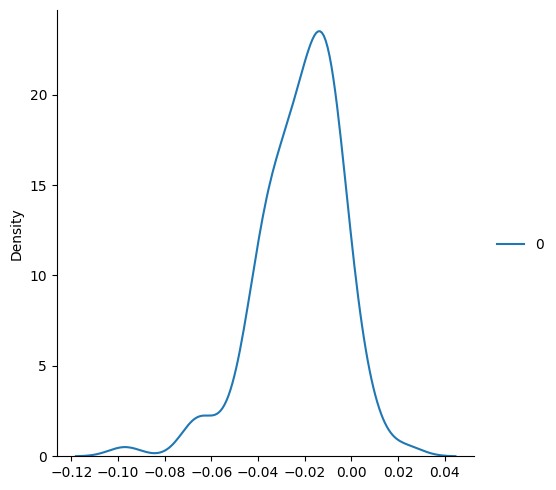

In [54]:
import seaborn as sns
sns.displot(residuals,kind="kde")

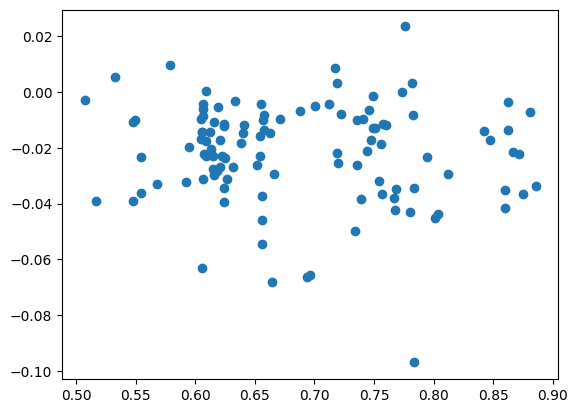

In [55]:
plt.scatter(test_pred,residuals)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,test_pred))
print(mean_squared_error(y_test,test_pred))
print(np.sqrt(mean_squared_error(y_test,test_pred)))

0.022796214606071254
0.0007988336219942936
0.028263644881619455


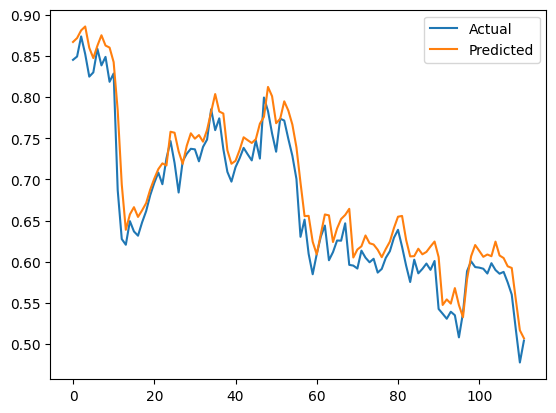

In [57]:
import matplotlib.pyplot as plt

plt.plot(y_test, label="Actual")
plt.plot(test_pred, label="Predicted")
plt.legend()
plt.show()

In [58]:
print(X_train)

[[[0.24032043]
  [0.23734107]
  [0.24904128]
  [0.23819118]]

 [[0.23453494]
  [0.23912559]
  [0.24430408]
  [0.23595254]]

 [[0.23587005]
  [0.25072496]
  [0.25197383]
  [0.25833893]]

 ...

 [[0.82198487]
  [0.81730984]
  [0.82404692]
  [0.80859637]]

 [[0.80106809]
  [0.8182021 ]
  [0.82021205]
  [0.81083501]]

 [[0.80129061]
  [0.83270132]
  [0.82133995]
  [0.83501231]]]


In [59]:
print(X_test)

[[[0.84334668]
  [0.84340843]
  [0.85156779]
  [0.8444146 ]]

 [[0.84757454]
  [0.84675441]
  [0.86194451]
  [0.84531005]]

 [[0.84957721]
  [0.86504573]
  [0.86645612]
  [0.87418849]]

 [[0.86515354]
  [0.87173768]
  [0.85450034]
  [0.8524737 ]]

 [[0.84445928]
  [0.83939326]
  [0.82607715]
  [0.82314753]]

 [[0.81909212]
  [0.83381664]
  [0.82246785]
  [0.82963958]]

 [[0.82688028]
  [0.85166183]
  [0.84367246]
  [0.86165212]]

 [[0.85892301]
  [0.85478474]
  [0.84480036]
  [0.83680322]]

 [[0.83044059]
  [0.84653134]
  [0.85089104]
  [0.84799642]]

 [[0.84534935]
  [0.84050859]
  [0.82765621]
  [0.81284979]]

 [[0.80729862]
  [0.82935534]
  [0.83194225]
  [0.82561003]]

 [[0.78771696]
  [0.78853446]
  [0.6850891 ]
  [0.69129169]]

 [[0.68291055]
  [0.6910551 ]
  [0.63501015]
  [0.6261473 ]]

 [[0.60970182]
  [0.62904305]
  [0.61921949]
  [0.62144616]]

 [[0.62527815]
  [0.64554986]
  [0.64290548]
  [0.64875756]]

 [[0.64663996]
  [0.6439884 ]
  [0.64674036]
  [0.63801209]]

 [[0.627

In [60]:
print(y_train)

[[0.23823398]
 [0.2371134 ]
 [0.25773196]
 ...
 [0.81107127]
 [0.80905424]
 [0.83572389]]


In [61]:
scaler

MinMaxScaler()

In [62]:
X_train[0]

array([[0.24032043],
       [0.23734107],
       [0.24904128],
       [0.23819118]])

In [63]:
X_test[0]

array([[0.84334668],
       [0.84340843],
       [0.85156779],
       [0.8444146 ]])

regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

In [64]:
feature_transform

,Open,High,Low,Last
Index,,,,
0,0.240320,0.237341,0.249041,0.238191
1,0.234535,0.239126,0.244304,0.235953
2,0.235870,0.250725,0.251974,0.258339
3,0.258789,0.262547,0.266185,0.256100
4,0.257454,0.253625,0.260320,0.253862
...,...,...,...,...
1230,0.585447,0.579969,0.546131,0.571748
1231,0.565198,0.592907,0.567336,0.554511
1232,0.536271,0.549632,0.524024,0.513320


In [65]:
df2

,Date,Open,High,Low,Last,Close,Close_Predicted
Index,,,,,,,
0,2013-10-08,157.00,157.80,155.20,155.80,155.80,158.029866
1,2013-10-09,155.70,158.20,154.15,155.30,155.55,157.349079
2,2013-10-10,156.00,160.80,155.85,160.30,160.15,159.001479
3,2013-10-11,161.15,163.45,159.00,159.80,160.05,162.665175
4,2013-10-14,160.85,161.45,157.70,159.30,159.45,161.613639
...,...,...,...,...,...,...,...
1230,2018-10-01,234.55,234.60,221.05,230.30,230.90,235.262114
1231,2018-10-03,230.00,237.50,225.75,226.45,227.60,234.804523
1232,2018-10-04,223.50,227.80,216.15,217.25,218.20,226.271473


In [66]:
features

['Open', 'High', 'Low', 'Last']

In [67]:
# New input data (your new entry)
new_entry = pd.DataFrame([[320.00, 400.00, 300.00, 380]], columns=features)


In [68]:
new_entry

,Open,High,Low,Last
0,320.0,400.0,300.0,380


In [69]:
# Load the scaler that was fitted on the features
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df2[features])

MinMaxScaler()

In [70]:
# Scale with the same scaler
new_scaled = scaler.transform(new_entry)
print(new_scaled)

[[0.96573209 1.3178675  0.90232348 1.24199687]]


In [71]:
# Reshape for LSTM input
new_scaled = new_scaled.reshape(new_scaled.shape[0], new_scaled.shape[1], 1)
print(new_scaled)

[[[0.96573209]
  [1.3178675 ]
  [0.90232348]
  [1.24199687]]]


In [72]:
predicted_scaled = model.predict(new_scaled)

# Pad & inverse transform
predicted_padded = np.concatenate([predicted_scaled, np.zeros((1, len(features)-1))], axis=1)
predicted_price = scaler.inverse_transform(predicted_padded)[:, 0][0]

print("Predicted Close Price:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Close Price: 348.3550977468491


In [73]:
import pickle
import tensorflow as tf

# Save the model in Keras native format
model.save("stock_prediction_model.keras")

# Save the model as a pickle file (Note: This is generally not recommended for Keras models)
with open('stock_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
pickle.dump(scaler, open('scaler_fitted.pkl', 'wb'))

print("Model and scaler saved successfully in both formats.")

Model and scaler saved successfully in both formats.
